 SUPPORT VECTOR MACHINE 


 >This code loads the iris dataset, scales the features, and then
trains a linear SVM model (using the LinearSVC class with C = 1 and the hinge loss
function) to detect Iris-Virginica flowers.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC 


In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

In [4]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

In [5]:
svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

Nonlinear SVM Classification
    -: One approach to
handling nonlinear datasets is to add more features, such as polynomial features

In [6]:
from sklearn.datasets import make_moons 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 

In [7]:
polynomial_svm_clf = Pipeline([
    
    ("poly_features", PolynomialFeatures(degree=3)),
    ("Scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('Scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

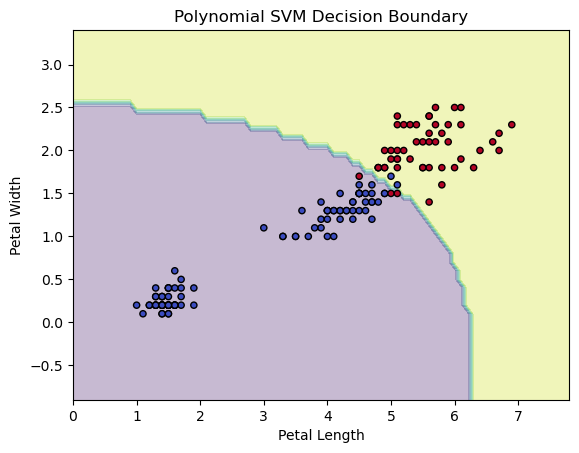

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each grid point
Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Linear SVM CLassifier with Polynomial Features')
plt.show()

Polynomial Kernel 
    -: the kernel trick makes it possible to get the same result as if you added many polynomial features, even with very high degree polynomials, without actually having to add them.

In [8]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

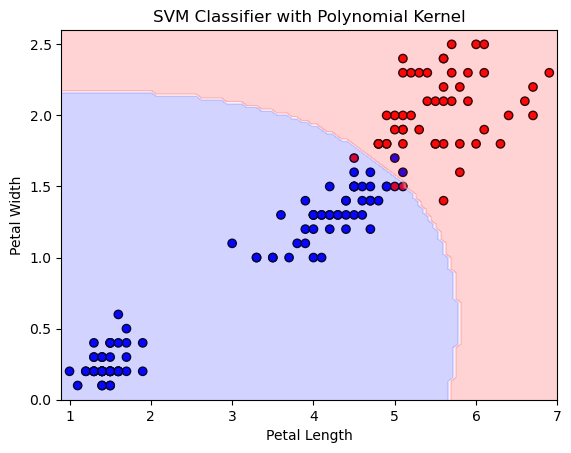

In [10]:
# Plot decision boundary
def plot_decision_boundary(clf, X, y, ax=None):
    x0s = np.linspace(np.min(X[:, 0]) - 0.1, np.max(X[:, 0]) + 0.1, 100)
    x1s = np.linspace(np.min(X[:, 1]) - 0.1, np.max(X[:, 1]) + 0.1, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    if ax is None:
        ax = plt.gca()
    ax.contourf(x0, x1, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')

# Plot decision boundary
plot_decision_boundary(poly_kernel_svm_clf, X, y)

# Set labels and title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Classifier with Polynomial Kernel')

# Show plot
plt.show()

Gaussian RBF Kernel 

In [11]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

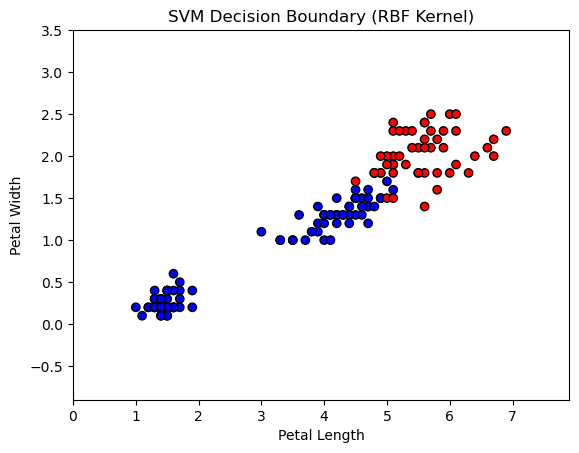

In [14]:


# 1. Generate sample data points
X0, X1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100),
    )
X_new = np.c_[X0.ravel(), X1.ravel()]

# 2: Train the SVM classifier
rbf_kernel_svm_clf.fit(X, y)
y_pred = rbf_kernel_svm_clf.predict(X_new)
y_pred = y_pred.reshape(X0.shape)

# 3: Plot the decision boundary
plt.contour(X0, X1, y_pred, cmap=plt.cm.bwr, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.show()



NOTES:
    1. Increasing gamma makes the bell-shape curve narrower and thus each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances.
    2. A small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother.
    3. Like C in polynomial features, γ acts like a regularization hyperparameter.
    4. Always try the linear kernel first (remember that LinearSVC is much faster than SVC(ker
nel="linear")), especially if the training set is very large or if it has plenty of features.